In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [381]:
df = pd.read_csv('ex2data1.txt', header = None)

In [382]:
X = df.iloc[:,:2]
Y = df.iloc[:,2]
X = np.column_stack((np.ones((X.shape[0],1)),X))

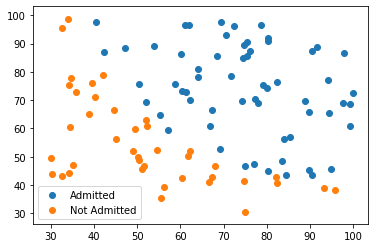

In [383]:
m = X.shape[0]
n = X.shape[1]
alpha = 0.001
iterations = 200000
theta = np.zeros((n,1))
admitted = df.iloc[:,2]==1
notadmitted = df.iloc[:,2]==0
plt.scatter(X[admitted,1],X[admitted,2],label = 'Admitted')
plt.scatter(X[notadmitted,1],X[notadmitted,2], label = 'Not Admitted')
plt.legend()
Y = Y[:,np.newaxis]

In [384]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [385]:
def CostFunction(X, y, theta):
    ghx = sigmoid(X @ theta)
    tosum = (y * np.log(ghx)) +((1 - y) * np.log(1 - ghx))
    # gradient
    grad = (sum((ghx-y) * X))/m
    cost = -((1/m) * np.sum(tosum))
    return cost,grad

In [386]:
test_theta = np.array([-24,0.2,0.2])[:,np.newaxis]
cost,grad = CostFunction(X,Y,theta)
cost,grad

(0.6931471805599453, array([ -0.1       , -12.00921659, -11.26284221]))

In [387]:
def GradientDescent(X,y,theta):
    ghx = sigmoid(X @ theta)
    grad = (sum((ghx-y) * X))/m
    temp = theta
    temp = theta - (alpha * grad[:,np.newaxis])
    return temp

In [388]:
for i in range(iterations):
    theta = GradientDescent(X,Y,theta)

In [389]:
theta

array([[-7.45017822],
       [ 0.06550395],
       [ 0.05898701]])

In [390]:
# Accuracy
sum(np.round(sigmoid(X@theta)) == Y)

array([93])